# Spotipy Imports

In [11]:
import os
import json
import spotipy
import spotipy.util as util
import spotipy.oauth2 as oauth2
from json.decoder import JSONDecodeError

from config import *

In [2]:
import numpy as np
import pandas as pd

### Username number

In [3]:
username = '12166626141'

In [4]:
scope_list = ['user-read-currently-playing','user-read-playback-state',\
              'user-follow-read','user-library-read','user-top-read','user-read-recently-played']

# Throw all permissions from the list into a string for token function:
scope = ' '.join(scope_list)

## Authourize access

In [12]:
token = util.prompt_for_user_token(
    username,scope=scope,
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redirect_uri
)


In [6]:
sp = spotipy.Spotify(auth=token)

In [13]:
spo = oauth2.SpotifyOAuth(
    scope=scope,
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redirect_uri
)

In [18]:
spo.refresh_access_token('refresh_token')

#### To see what is stored: print(json.dumps(VARIABLE, sort_keys=True, indent=4))

## Explore Genres to find audio features

 - This will be useful when comparing an artist to a possibly new genre!

In [7]:
# Get a list of genres available for the recommendations function.

genres = sp.recommendation_genre_seeds()
print(json.dumps(genres, sort_keys=True, indent=4))

{
    "genres": [
        "acoustic",
        "afrobeat",
        "alt-rock",
        "alternative",
        "ambient",
        "anime",
        "black-metal",
        "bluegrass",
        "blues",
        "bossanova",
        "brazil",
        "breakbeat",
        "british",
        "cantopop",
        "chicago-house",
        "children",
        "chill",
        "classical",
        "club",
        "comedy",
        "country",
        "dance",
        "dancehall",
        "death-metal",
        "deep-house",
        "detroit-techno",
        "disco",
        "disney",
        "drum-and-bass",
        "dub",
        "dubstep",
        "edm",
        "electro",
        "electronic",
        "emo",
        "folk",
        "forro",
        "french",
        "funk",
        "garage",
        "german",
        "gospel",
        "goth",
        "grindcore",
        "groove",
        "grunge",
        "guitar",
        "happy",
        "hard-rock",
        "hardcore",
        "hardstyle",
  

In [55]:
len(genres["genres"])

126

In [8]:
# Recommend Tracks in specific genre
# Found out recommendations can use attributes <audio_feature> as inputs! 

searchGenres = ["funk"]

recommendedTracks = sp.recommendations(seed_genres=searchGenres, limit=100)

In [9]:
print(json.dumps(recommendedTracks, sort_keys=True, indent=4))

{
    "seeds": [
        {
            "afterFilteringSize": 80,
            "afterRelinkingSize": 80,
            "href": null,
            "id": "funk",
            "initialPoolSize": 80,
            "type": "GENRE"
        }
    ],
    "tracks": [
        {
            "album": {
                "album_type": "ALBUM",
                "artists": [
                    {
                        "external_urls": {
                            "spotify": "https://open.spotify.com/artist/4n7L1vYXp4Dt0HfxaLBj9l"
                        },
                        "href": "https://api.spotify.com/v1/artists/4n7L1vYXp4Dt0HfxaLBj9l",
                        "id": "4n7L1vYXp4Dt0HfxaLBj9l",
                        "name": "Dazz Band",
                        "type": "artist",
                        "uri": "spotify:artist:4n7L1vYXp4Dt0HfxaLBj9l"
                    }
                ],
                "available_markets": [
                    "AD",
                    "AR",
                    "

In [27]:
print("Dict Keys for sp.recommendations")
print(recommendedTracks.keys())
print()
print(f'Length of genre tracks is: {len(recommendedTracks["tracks"])}')
print()
print("Dict Keys for each Track")
print(recommendedTracks["tracks"][0].keys())
print()
print("Artist Name")
print(recommendedTracks["tracks"][0]["artists"][0]["name"])

Dict Keys for sp.recommendations
dict_keys(['tracks', 'seeds'])

Length of genre tracks is: 80

Dict Keys for each Track
dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

Artist Name
Dazz Band


## Extract all track_ids to a list:

#### note: audio_features has a 50 track maximum

In [29]:
# LIst comprehension

genreTrackIDs = [track["id"] for track in recommendedTracks["tracks"]]
genreTrackNames = [track["name"] for track in recommendedTracks["tracks"]]
genreTrackPop = [track["popularity"] for track in recommendedTracks["tracks"]]
genreTrackArtist = [track["artists"][0]["name"] for track in recommendedTracks["tracks"]]

genreTrackArtist

['Dazz Band',
 'Lettuce',
 'Parliament',
 'Tower Of Power',
 'War',
 'The Gap Band',
 'Tom Browne',
 'Mandrill',
 'Michael Jackson',
 'Dyke & The Blazers',
 'Commodores',
 'Earth, Wind & Fire',
 'Sly & The Family Stone',
 'Nils Landgren Funk Unit',
 '6ix Toys',
 'Roy Ayers',
 'Strokeland Superband',
 'Lyn Collins',
 'CHIC',
 'Rick James',
 'Con Funk Shun',
 'Charles Wright & The Watts 103rd Street Rhythm Band',
 'Bobby Byrd',
 'Electro Deluxe',
 'CHIC',
 'Stevie Wonder',
 'Tower Of Power',
 'Commodores',
 'War',
 'The Bar-Kays',
 'Papa Grows Funk',
 'Average White Band',
 'Rocco Prestia',
 'James Brown',
 'Zapp',
 'Ohio Players',
 'Rufus',
 'The Haggis Horns',
 'Kool & The Gang',
 'Phat Phunktion',
 'Rufus Featuring Chaka Khan',
 'Curtis Mayfield',
 'Nils Landgren Funk Unit',
 'Gizelle Smith',
 'Wild Cherry',
 'Excellent Gentlemen',
 'The Meters',
 'George Duke',
 "Fred Wesley & The J.B.'s",
 'The Isley Brothers',
 'Jurassik Funk',
 'Con Funk Shun',
 'Kool & The Gang',
 'Rick James',
 

In [30]:
print(len(genreTrackIDs[0:50]))
print(len(genreTrackIDs[50:100]))
# perhaps ask if list is empty before running!

50
30


In [31]:
trackFeatures = [sp.audio_features(genreTrackIDs[i:i+50]) for i in range(0,len(genreTrackIDs),50)]


In [32]:
print(json.dumps(trackFeatures, sort_keys=True, indent=4))

[
    [
        {
            "acousticness": 0.12,
            "analysis_url": "https://api.spotify.com/v1/audio-analysis/3h5IJ0EzVpkiaoL174GC3M",
            "danceability": 0.829,
            "duration_ms": 287000,
            "energy": 0.886,
            "id": "3h5IJ0EzVpkiaoL174GC3M",
            "instrumentalness": 0.000376,
            "key": 9,
            "liveness": 0.0851,
            "loudness": -4.456,
            "mode": 0,
            "speechiness": 0.0431,
            "tempo": 132.09,
            "time_signature": 4,
            "track_href": "https://api.spotify.com/v1/tracks/3h5IJ0EzVpkiaoL174GC3M",
            "type": "audio_features",
            "uri": "spotify:track:3h5IJ0EzVpkiaoL174GC3M",
            "valence": 0.928
        },
        {
            "acousticness": 0.311,
            "analysis_url": "https://api.spotify.com/v1/audio-analysis/7cnWNeQIQutKJmL3MZSfr6",
            "danceability": 0.746,
            "duration_ms": 251293,
            "energy": 0.525

In [33]:
# Merge output lists of dictionaries within list
allTrackFeatures = []
for i in trackFeatures:
    allTrackFeatures = allTrackFeatures + i

## Create a Dataframe for the genre tracks and analyse like before: 

In [41]:
df_genreFeatures = pd.DataFrame(allTrackFeatures)
df_genreFeatures['popularity'] = genreTrackPop
df_genreFeatures['name'] = genreTrackNames
df_genreFeatures['artist'] = genreTrackArtist
df_genreFeatures.drop(columns=['analysis_url','type','uri'], inplace=True)
df_genreFeatures.head(10)

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,valence,popularity,name,artist
0,0.12000,0.829,287000,0.886,3h5IJ0EzVpkiaoL174GC3M,0.000376,9,0.0851,-4.456,0,0.0431,132.090,4,https://api.spotify.com/v1/tracks/3h5IJ0EzVpki...,0.928,54,Let It Whip,Dazz Band
1,0.31100,0.746,251293,0.525,7cnWNeQIQutKJmL3MZSfr6,0.008670,0,0.0818,-8.700,1,0.1860,95.116,4,https://api.spotify.com/v1/tracks/7cnWNeQIQutK...,0.835,48,Do It Like You Do,Lettuce
2,0.08290,0.719,348067,0.579,4FuSwwcHdeSuZcdA4Sice2,0.000000,9,0.1600,-12.418,1,0.0493,105.644,4,https://api.spotify.com/v1/tracks/4FuSwwcHdeSu...,0.806,0,Give Up The Funk (Tear The Roof Off The Sucker),Parliament
3,0.13800,0.666,304733,0.733,66TSoVnJ1P9Tyok03zUlTr,0.000349,9,0.0892,-5.884,1,0.0563,101.858,4,https://api.spotify.com/v1/tracks/66TSoVnJ1P9T...,0.597,51,What Is Hip?,Tower Of Power
4,0.09960,0.819,191560,0.660,2fmMPJb5EzZCx8BcNJvVk4,0.693000,0,0.0575,-10.942,1,0.0515,139.730,4,https://api.spotify.com/v1/tracks/2fmMPJb5EzZC...,0.990,59,Low Rider,War
5,0.40600,0.797,376640,0.504,1MOl6vGP299N8vd4zaHMTE,0.015000,6,0.0313,-10.533,1,0.0411,98.871,4,https://api.spotify.com/v1/tracks/1MOl6vGP299N...,0.849,59,"Outstanding - Original 12"" Mix",The Gap Band
6,0.43600,0.854,280933,0.776,0xbkxTqSaW5blsYgRXpB5I,0.175000,8,0.0549,-9.850,1,0.2170,111.212,4,https://api.spotify.com/v1/tracks/0xbkxTqSaW5b...,0.656,55,Funkin' for Jamaica,Tom Browne
7,0.10600,0.746,261945,0.612,62W5VouctXG9jggZdHaEi1,0.000182,0,0.2920,-10.328,1,0.1170,98.742,4,https://api.spotify.com/v1/tracks/62W5VouctXG9...,0.639,41,Livin' It Up,Mandrill
8,0.01780,0.909,313080,0.963,7BaCmGzaj4tzJkPT2JhkxO,0.003000,7,0.0877,-4.922,1,0.0735,130.111,4,https://api.spotify.com/v1/tracks/7BaCmGzaj4tz...,0.849,1,Workin' Day And Night,Michael Jackson
9,0.00784,0.830,193680,0.565,17Y2K7uNxMkaTDBtf1Tcv3,0.004290,9,0.0873,-11.013,0,0.0507,112.163,4,https://api.spotify.com/v1/tracks/17Y2K7uNxMka...,0.873,55,Let A Woman Be A Woman - Let A Man Be A Man,Dyke & The Blazers


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df_genreStats = df_genreFeatures.drop(columns=['id','key','mode','time_signature','duration_ms', 'loudness','tempo', 'popularity'])

In [19]:
df_genreStats

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
Name,,,,,,,
Let It Whip,0.120000,0.829,0.886,0.000376,0.0851,0.0431,0.928
Do It Like You Do,0.311000,0.746,0.525,0.008670,0.0818,0.1860,0.835
Give Up The Funk (Tear The Roof Off The Sucker),0.082900,0.719,0.579,0.000000,0.1600,0.0493,0.806
What Is Hip?,0.138000,0.666,0.733,0.000349,0.0892,0.0563,0.597
Low Rider,0.099600,0.819,0.660,0.693000,0.0575,0.0515,0.990
"Outstanding - Original 12"" Mix",0.406000,0.797,0.504,0.015000,0.0313,0.0411,0.849
Funkin' for Jamaica,0.436000,0.854,0.776,0.175000,0.0549,0.2170,0.656
Livin' It Up,0.106000,0.746,0.612,0.000182,0.2920,0.1170,0.639
Workin' Day And Night,0.017800,0.909,0.963,0.003000,0.0877,0.0735,0.849


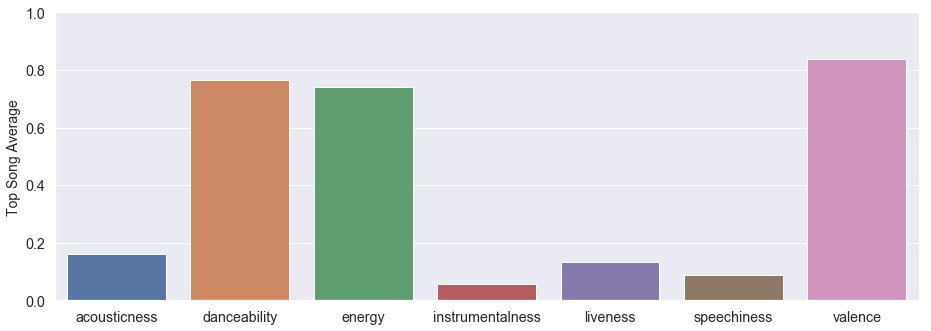

In [20]:
sns.set(style='whitegrid')
sns.set(font_scale=1.3) 

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
ax.set(ylim = (0,1))
sns.barplot(x=df_genreStats.columns, y=df_genreStats.mean())

ax.set_ylabel('Top Song Average', fontsize=14)
plt.show()

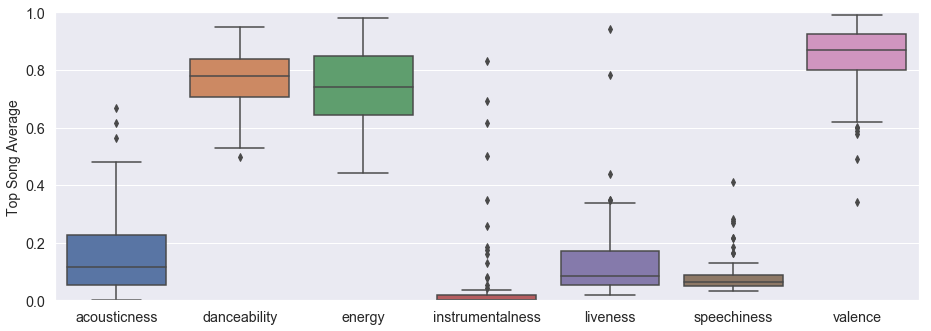

In [21]:
sns.set(style='whitegrid')
sns.set(font_scale=1.3) 

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
ax.set(ylim = (0,1))
sns.boxplot(x='variable', y='value', data=pd.melt(df_genreStats))
ax.set_xlabel('')
ax.set_ylabel('Top Song Average', fontsize=14)
plt.show()

## Find useful ways to represent other data points!

 - Start wirth KeyMapping

In [42]:
df_genreFeatures.head()

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,valence,popularity,name,artist
0,0.1200,0.829,287000,0.886,3h5IJ0EzVpkiaoL174GC3M,0.000376,9,0.0851,-4.456,0,0.0431,132.090,4,https://api.spotify.com/v1/tracks/3h5IJ0EzVpki...,0.928,54,Let It Whip,Dazz Band
1,0.3110,0.746,251293,0.525,7cnWNeQIQutKJmL3MZSfr6,0.008670,0,0.0818,-8.700,1,0.1860,95.116,4,https://api.spotify.com/v1/tracks/7cnWNeQIQutK...,0.835,48,Do It Like You Do,Lettuce
2,0.0829,0.719,348067,0.579,4FuSwwcHdeSuZcdA4Sice2,0.000000,9,0.1600,-12.418,1,0.0493,105.644,4,https://api.spotify.com/v1/tracks/4FuSwwcHdeSu...,0.806,0,Give Up The Funk (Tear The Roof Off The Sucker),Parliament
3,0.1380,0.666,304733,0.733,66TSoVnJ1P9Tyok03zUlTr,0.000349,9,0.0892,-5.884,1,0.0563,101.858,4,https://api.spotify.com/v1/tracks/66TSoVnJ1P9T...,0.597,51,What Is Hip?,Tower Of Power
4,0.0996,0.819,191560,0.660,2fmMPJb5EzZCx8BcNJvVk4,0.693000,0,0.0575,-10.942,1,0.0515,139.730,4,https://api.spotify.com/v1/tracks/2fmMPJb5EzZC...,0.990,59,Low Rider,War


In [43]:
# map key numbers with actual letter Keys
keyMap = {
    0:"C",
    1:"C#/Db",
    2:"D",
    3:"D#/Eb",
    4:"E",
    5:"F",
    6:"F#/Gb",
    7:"G",
    8:"G#/Ab",
    9:"A",
    10:"A#/Bb",
    11:"B",
}
df_genreFeatures["key"] = df_genreFeatures["key"].map(keyMap)
df_genreFeatures

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,valence,popularity,name,artist
0,0.120000,0.829,287000,0.886,3h5IJ0EzVpkiaoL174GC3M,0.000376,A,0.0851,-4.456,0,0.0431,132.090,4,https://api.spotify.com/v1/tracks/3h5IJ0EzVpki...,0.928,54,Let It Whip,Dazz Band
1,0.311000,0.746,251293,0.525,7cnWNeQIQutKJmL3MZSfr6,0.008670,C,0.0818,-8.700,1,0.1860,95.116,4,https://api.spotify.com/v1/tracks/7cnWNeQIQutK...,0.835,48,Do It Like You Do,Lettuce
2,0.082900,0.719,348067,0.579,4FuSwwcHdeSuZcdA4Sice2,0.000000,A,0.1600,-12.418,1,0.0493,105.644,4,https://api.spotify.com/v1/tracks/4FuSwwcHdeSu...,0.806,0,Give Up The Funk (Tear The Roof Off The Sucker),Parliament
3,0.138000,0.666,304733,0.733,66TSoVnJ1P9Tyok03zUlTr,0.000349,A,0.0892,-5.884,1,0.0563,101.858,4,https://api.spotify.com/v1/tracks/66TSoVnJ1P9T...,0.597,51,What Is Hip?,Tower Of Power
4,0.099600,0.819,191560,0.660,2fmMPJb5EzZCx8BcNJvVk4,0.693000,C,0.0575,-10.942,1,0.0515,139.730,4,https://api.spotify.com/v1/tracks/2fmMPJb5EzZC...,0.990,59,Low Rider,War
5,0.406000,0.797,376640,0.504,1MOl6vGP299N8vd4zaHMTE,0.015000,F#/Gb,0.0313,-10.533,1,0.0411,98.871,4,https://api.spotify.com/v1/tracks/1MOl6vGP299N...,0.849,59,"Outstanding - Original 12"" Mix",The Gap Band
6,0.436000,0.854,280933,0.776,0xbkxTqSaW5blsYgRXpB5I,0.175000,G#/Ab,0.0549,-9.850,1,0.2170,111.212,4,https://api.spotify.com/v1/tracks/0xbkxTqSaW5b...,0.656,55,Funkin' for Jamaica,Tom Browne
7,0.106000,0.746,261945,0.612,62W5VouctXG9jggZdHaEi1,0.000182,C,0.2920,-10.328,1,0.1170,98.742,4,https://api.spotify.com/v1/tracks/62W5VouctXG9...,0.639,41,Livin' It Up,Mandrill
8,0.017800,0.909,313080,0.963,7BaCmGzaj4tzJkPT2JhkxO,0.003000,G,0.0877,-4.922,1,0.0735,130.111,4,https://api.spotify.com/v1/tracks/7BaCmGzaj4tz...,0.849,1,Workin' Day And Night,Michael Jackson
9,0.007840,0.830,193680,0.565,17Y2K7uNxMkaTDBtf1Tcv3,0.004290,A,0.0873,-11.013,0,0.0507,112.163,4,https://api.spotify.com/v1/tracks/17Y2K7uNxMka...,0.873,55,Let A Woman Be A Woman - Let A Man Be A Man,Dyke & The Blazers


In [24]:
keyGroup = df_genreFeatures.groupby(by="key").count()

keyGroup.reset_index(inplace=True)
keyGroup["id"]

0     14
1      5
2      6
3     13
4      8
5      5
6      3
7     10
8      4
9      6
10     6
Name: id, dtype: int64

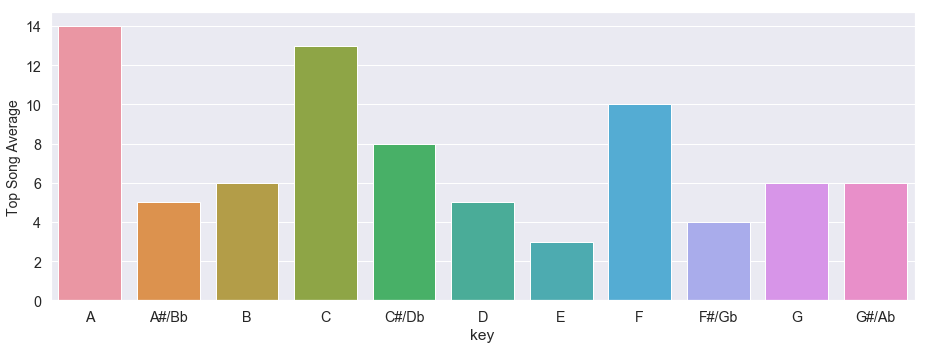

In [47]:
sns.set(font_scale=1.3) 

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
sns.barplot(x="key",y="id",data=keyGroup)

ax.set_ylabel('Top Song Average', fontsize=14)
plt.show()

### Map "Mode" by major and minor

In [48]:
modeMap = {
    0:"minor",
    1:"major",
}
df_genreFeatures["mode"] = df_genreFeatures["mode"].map(modeMap)
df_genreFeatures

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,valence,popularity,name,artist
0,0.120000,0.829,287000,0.886,3h5IJ0EzVpkiaoL174GC3M,0.000376,A,0.0851,-4.456,minor,0.0431,132.090,4,https://api.spotify.com/v1/tracks/3h5IJ0EzVpki...,0.928,54,Let It Whip,Dazz Band
1,0.311000,0.746,251293,0.525,7cnWNeQIQutKJmL3MZSfr6,0.008670,C,0.0818,-8.700,major,0.1860,95.116,4,https://api.spotify.com/v1/tracks/7cnWNeQIQutK...,0.835,48,Do It Like You Do,Lettuce
2,0.082900,0.719,348067,0.579,4FuSwwcHdeSuZcdA4Sice2,0.000000,A,0.1600,-12.418,major,0.0493,105.644,4,https://api.spotify.com/v1/tracks/4FuSwwcHdeSu...,0.806,0,Give Up The Funk (Tear The Roof Off The Sucker),Parliament
3,0.138000,0.666,304733,0.733,66TSoVnJ1P9Tyok03zUlTr,0.000349,A,0.0892,-5.884,major,0.0563,101.858,4,https://api.spotify.com/v1/tracks/66TSoVnJ1P9T...,0.597,51,What Is Hip?,Tower Of Power
4,0.099600,0.819,191560,0.660,2fmMPJb5EzZCx8BcNJvVk4,0.693000,C,0.0575,-10.942,major,0.0515,139.730,4,https://api.spotify.com/v1/tracks/2fmMPJb5EzZC...,0.990,59,Low Rider,War
5,0.406000,0.797,376640,0.504,1MOl6vGP299N8vd4zaHMTE,0.015000,F#/Gb,0.0313,-10.533,major,0.0411,98.871,4,https://api.spotify.com/v1/tracks/1MOl6vGP299N...,0.849,59,"Outstanding - Original 12"" Mix",The Gap Band
6,0.436000,0.854,280933,0.776,0xbkxTqSaW5blsYgRXpB5I,0.175000,G#/Ab,0.0549,-9.850,major,0.2170,111.212,4,https://api.spotify.com/v1/tracks/0xbkxTqSaW5b...,0.656,55,Funkin' for Jamaica,Tom Browne
7,0.106000,0.746,261945,0.612,62W5VouctXG9jggZdHaEi1,0.000182,C,0.2920,-10.328,major,0.1170,98.742,4,https://api.spotify.com/v1/tracks/62W5VouctXG9...,0.639,41,Livin' It Up,Mandrill
8,0.017800,0.909,313080,0.963,7BaCmGzaj4tzJkPT2JhkxO,0.003000,G,0.0877,-4.922,major,0.0735,130.111,4,https://api.spotify.com/v1/tracks/7BaCmGzaj4tz...,0.849,1,Workin' Day And Night,Michael Jackson
9,0.007840,0.830,193680,0.565,17Y2K7uNxMkaTDBtf1Tcv3,0.004290,A,0.0873,-11.013,minor,0.0507,112.163,4,https://api.spotify.com/v1/tracks/17Y2K7uNxMka...,0.873,55,Let A Woman Be A Woman - Let A Man Be A Man,Dyke & The Blazers


# Lets put df_genreFeatures in a sqlite database!

### Create SQLITE Engine

In [44]:
from sqlalchemy import create_engine

In [45]:
engine = create_engine("sqlite:///../Resources/genres.sqlite", echo=False)

In [46]:
conn = engine.connect()

In [52]:
df_genreFeatures.to_sql(name=searchGenres[0],con=conn, if_exists="replace")

### Check data was entered into database

In [53]:
engine.execute('SELECT * FROM funk LIMIT 10').fetchall()

[(0, 0.12, 0.829, 287000, 0.886, '3h5IJ0EzVpkiaoL174GC3M', 0.000376, 'A', 0.0851, -4.456, 'minor', 0.0431, 132.09, 4, 'https://api.spotify.com/v1/tracks/3h5IJ0EzVpkiaoL174GC3M', 0.928, 54, 'Let It Whip', 'Dazz Band'),
 (1, 0.311, 0.746, 251293, 0.525, '7cnWNeQIQutKJmL3MZSfr6', 0.00867, 'C', 0.0818, -8.7, 'major', 0.186, 95.116, 4, 'https://api.spotify.com/v1/tracks/7cnWNeQIQutKJmL3MZSfr6', 0.835, 48, 'Do It Like You Do', 'Lettuce'),
 (2, 0.0829, 0.719, 348067, 0.579, '4FuSwwcHdeSuZcdA4Sice2', 0.0, 'A', 0.16, -12.418, 'major', 0.0493, 105.644, 4, 'https://api.spotify.com/v1/tracks/4FuSwwcHdeSuZcdA4Sice2', 0.806, 0, 'Give Up The Funk (Tear The Roof Off The Sucker)', 'Parliament'),
 (3, 0.138, 0.666, 304733, 0.733, '66TSoVnJ1P9Tyok03zUlTr', 0.000349, 'A', 0.0892, -5.884, 'major', 0.0563, 101.858, 4, 'https://api.spotify.com/v1/tracks/66TSoVnJ1P9Tyok03zUlTr', 0.597, 51, 'What Is Hip?', 'Tower Of Power'),
 (4, 0.0996, 0.819, 191560, 0.66, '2fmMPJb5EzZCx8BcNJvVk4', 0.693, 'C', 0.0575, -10.94

## Time to make a python file to upload data to "genres.sqlite"

 - Python file should be able to update all genres by running from command line!
 
 - use recommendation_genre_seeds as a list of genres to run function on
 - function should collect < 100 songs for each genre and and run audio_features for each song
 - function should then convert to dataframe and map appropriate data ex: keyMap, modeMap
 - connect to genres.sqlite and import dataframe to searchGenre variable

In [56]:
import time

In [57]:
alist = [12,2,3,5,67,7,3,234,6,3,23,5,3,6,67,3]

In [58]:
for i in alist:
    print(i)
    print("Calculating.......")
    time.sleep(10)
    print(f"Calculation reads: {i>5}")

12
Calculating.......
Calculation reads: True
2
Calculating.......
Calculation reads: False
3
Calculating.......
Calculation reads: False
5
Calculating.......


KeyboardInterrupt: 

In [67]:
x = 5

In [68]:
x *= 2

In [70]:
x *= 2

In [71]:
x

20

In [ ]:
for g in genres:
	sleepMinutes = 5
	while True:
		try:
			uploadGenre(g)
			print("Wating 30 seconds until next upload")
			print()
			time.sleep(30)

		except:
			print(f"Genre {g} was not uploaded:")
			print(f"Waiting {sleepMinutes} minutes until next attempt")
			time.sleep(sleepMinutes*60)
			sleepMinutes *= 2
			print()
			continue
		break
